In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<AxesSubplot:xlabel='Date'>

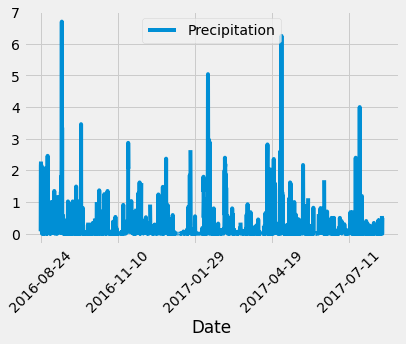

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).filter(Measurement.date<'2017-08-23').\
filter(Measurement.date>'2016-08-23').order_by(Measurement.date).all()

# Calculate the date one year from the last date in data set.
one_yearago= dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
qu_date_prcp=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date<'2017-08-23').\
filter(Measurement.date>'2016-08-23').order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df=pd.DataFrame(qu_date_prcp, columns=['Date','Precipitation'])
#findate_prcp_df=date_prcp_df.set_index('Date')


# Sort the dataframe by date
odate_prcp_df=date_prcp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data

odate_prcp_df.plot(x='Date', y='Precipitation',rot=45)


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,
        func.count()).group_by(Measurement.station)\
        .order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281=session.query(Measurement.station,Measurement.tobs,Measurement.date).filter(Measurement.station=='USC00519281').all()
USC00519281_df= pd.DataFrame(USC00519281, columns=['Station','tobs','Date'])
USC00519281mean=USC00519281_df['tobs'].mean()
USC00519281min=USC00519281_df['tobs'].min()
USC00519281max=USC00519281_df['tobs'].max()

print(f'mean:{USC00519281mean}, min:{USC00519281min}, max:{USC00519281max}')


mean:71.66378066378067, min:54.0, max:85.0


<AxesSubplot:ylabel='Frequency'>

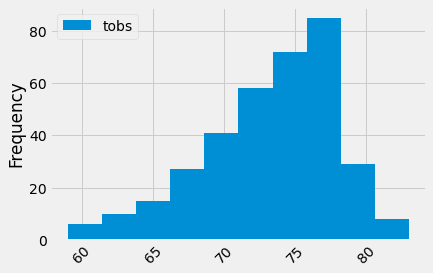

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobUSC00519281=session.query(Measurement.tobs,Measurement.date).\
filter(Measurement.station=='USC00519281').\
filter(Measurement.date<'2017-08-23').\
filter(Measurement.date>'2016-08-23').all()
tobUSC00519281_df=pd.DataFrame(tobUSC00519281, columns=['tobs','Date'])
tobUSC00519281_df.plot.hist(x='Date', y='tobs',rot=45)


# Close session

In [16]:
# Close Session
session.close()